In [90]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid')
sns.set_context('talk')
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
import plotly.express as px

# Data Loading and Exploration

In [91]:
# Utilize Pandas to load the dataset and explore its initial structure
df = pd.read_csv(r'C:\Repositories\DI-Bootcamp\Week14\Day1\DailyChallenge\data\train.csv')

# Quick Glance
pd.set_option('display.max_columns', None)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [92]:
# Check for Duplicates
print("Number of Duplicates:", df.duplicated().sum())

# Exploring Datatypes and Nulls
df.info()

Number of Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null

In [93]:
# Deeper Look at Categorical Features
categorical_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Loop through Each Categorical Column and Print the Unique Values + Counts
for col in categorical_cols:
    print(df[col].value_counts().sort_index())

blue
0    1010
1     990
Name: count, dtype: int64
dual_sim
0     981
1    1019
Name: count, dtype: int64
four_g
0     957
1    1043
Name: count, dtype: int64
n_cores
1    242
2    247
3    246
4    274
5    246
6    230
7    259
8    256
Name: count, dtype: int64
three_g
0     477
1    1523
Name: count, dtype: int64
touch_screen
0     994
1    1006
Name: count, dtype: int64
wifi
0     986
1    1014
Name: count, dtype: int64
price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64


# Statistical Analysis

## Central Tendency Measures

In [94]:
# Select only Numerical Columns
numerical_cols = df.drop(columns=categorical_cols)

# Central tendency measures
print("Mean:\n", numerical_cols.mean(), "\n")
print("Median:\n", numerical_cols.median(), "\n")
print("Mode:\n", numerical_cols.mode().iloc[0])  # take first mode if multiple


Mean:
 battery_power    1238.51850
clock_speed         1.52225
fc                  4.30950
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
dtype: float64 

Median:
 battery_power    1226.0
clock_speed         1.5
fc                  3.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.0
talk_time          11.0
dtype: float64 

Mode:
 battery_power     618.0
clock_speed         0.5
fc                  0.0
int_memory         27.0
m_dep               0.1
mobile_wt         182.0
pc                 10.0
px_height         347.0
px_width          874.0
ram              1229.0
sc_h               17.0
sc_

## Variability Analysis

In [95]:
# Analysis of variability (range, variance, standard deviation)
print("Range:\n", numerical_cols.max() - numerical_cols.min(), "\n")
print("Variance:\n", numerical_cols.var().round(4), "\n")
print("Standard Deviated:\n", numerical_cols.std().round(4), '\n')

Range:
 battery_power    1497.0
clock_speed         2.5
fc                 19.0
int_memory         62.0
m_dep               0.9
mobile_wt         120.0
pc                 20.0
px_height        1960.0
px_width         1498.0
ram              3742.0
sc_h               14.0
sc_w               18.0
talk_time          18.0
dtype: float64 

Variance:
 battery_power    1.930884e+05
clock_speed      6.659000e-01
fc               1.884810e+01
int_memory       3.292670e+02
m_dep            8.320000e-02
mobile_wt        1.253136e+03
pc               3.677590e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775140e+01
sc_w             1.897820e+01
talk_time        2.985480e+01
dtype: float64 

Standard Deviated:
 battery_power     439.4182
clock_speed         0.8160
fc                  4.3414
int_memory         18.1457
m_dep               0.2884
mobile_wt          35.3997
pc                  6.0643
px_height         443.7808
px_width 

In [96]:
# Evaluation of distribution shapes through skewness and kurtosis
shapes = numerical_cols.agg(['skew', 'kurt'])
print(shapes.T)

                   skew      kurt
battery_power  0.031898 -1.224144
clock_speed    0.178084 -1.323417
fc             1.019811  0.277076
int_memory     0.057889 -1.216074
m_dep          0.089082 -1.274349
mobile_wt      0.006558 -1.210376
pc             0.017306 -1.171499
px_height      0.666271 -0.315865
px_width       0.014787 -1.186005
ram            0.006628 -1.191913
sc_h          -0.098884 -1.190791
sc_w           0.633787 -0.389523
talk_time      0.009512 -1.218591


## Perform hypothesis testing for statistical significance between groups (e.g., different price ranges)

In [97]:
# Seprate into Different Dataframes depending on the Price Range
df_0 = df[df['price_range'] == 0]
df_1 = df[df['price_range'] == 1]
df_2 = df[df['price_range'] == 2]
df_3 = df[df['price_range'] == 3]

# Test for Statistical Significance (Using ANOVA) Between:
from scipy.stats import f_oneway

In [98]:
# RAM
f_stat, p_value = f_oneway(df_0['ram'], df_1['ram'], df_2['ram'], df_3['ram'])

# Result
if p_value < 0.05:
    print("Reject the Null Hypothesis. There is a statistically significant difference in RAM between the 4 groups")
else:
    print("Accept the Null Hypothesis. There is no statistical significance.")

Reject the Null Hypothesis. There is a statistically significant difference in RAM between the 4 groups


In [99]:
# Talk Time
f_stat, p_value = f_oneway(df_0['talk_time'], df_1['talk_time'], df_2['talk_time'], df_3['talk_time'])

# Result
if p_value < 0.05:
    print("Reject the Null Hypothesis. There is a statistically significant difference in Talk Time between the 4 groups")
else:
    print("Accept the Null Hypothesis. There is no statistical significance.")

Accept the Null Hypothesis. There is no statistical significance.


In [100]:
# Battery Power
f_stat, p_value = f_oneway(df_0['battery_power'], df_1['battery_power'], df_2['battery_power'], df_3['battery_power'])

# Result
if p_value < 0.05:
    print("Reject the Null Hypothesis. There is a statistically significant difference in Battery Power between the 4 groups")
else:
    print("Accept the Null Hypothesis. There is no statistical significance.")

Reject the Null Hypothesis. There is a statistically significant difference in Battery Power between the 4 groups


In [101]:
# Primary Camera Mega Pixels
f_stat, p_value = f_oneway(df_0['pc'], df_1['pc'], df_2['pc'], df_3['pc'])

# Result
if p_value < 0.05:
    print("Reject the Null Hypothesis. There is a statistically significant difference in Camera Mega Pixels between the 4 groups")
else:
    print("Accept the Null Hypothesis. There is no statistical significance.")

Accept the Null Hypothesis. There is no statistical significance.


## Investigate feature-target correlations using SciPy.

In [102]:
from scipy.stats import pearsonr

# Separate Features and Target
features = df.drop(columns='price_range')
target = df['price_range']

# Calculate Correlation
for col in features.columns:
    r, p = pearsonr(df[col], target)
    print(f"{col}: {r:.4f}")

battery_power: 0.2007
blue: 0.0206
clock_speed: -0.0066
dual_sim: 0.0174
fc: 0.0220
four_g: 0.0148
int_memory: 0.0444
m_dep: 0.0009
mobile_wt: -0.0303
n_cores: 0.0044
pc: 0.0336
px_height: 0.1489
px_width: 0.1658
ram: 0.9170
sc_h: 0.0230
sc_w: 0.0387
talk_time: 0.0219
three_g: 0.0236
touch_screen: -0.0304
wifi: 0.0188


# Data Visualization with Matplotlib

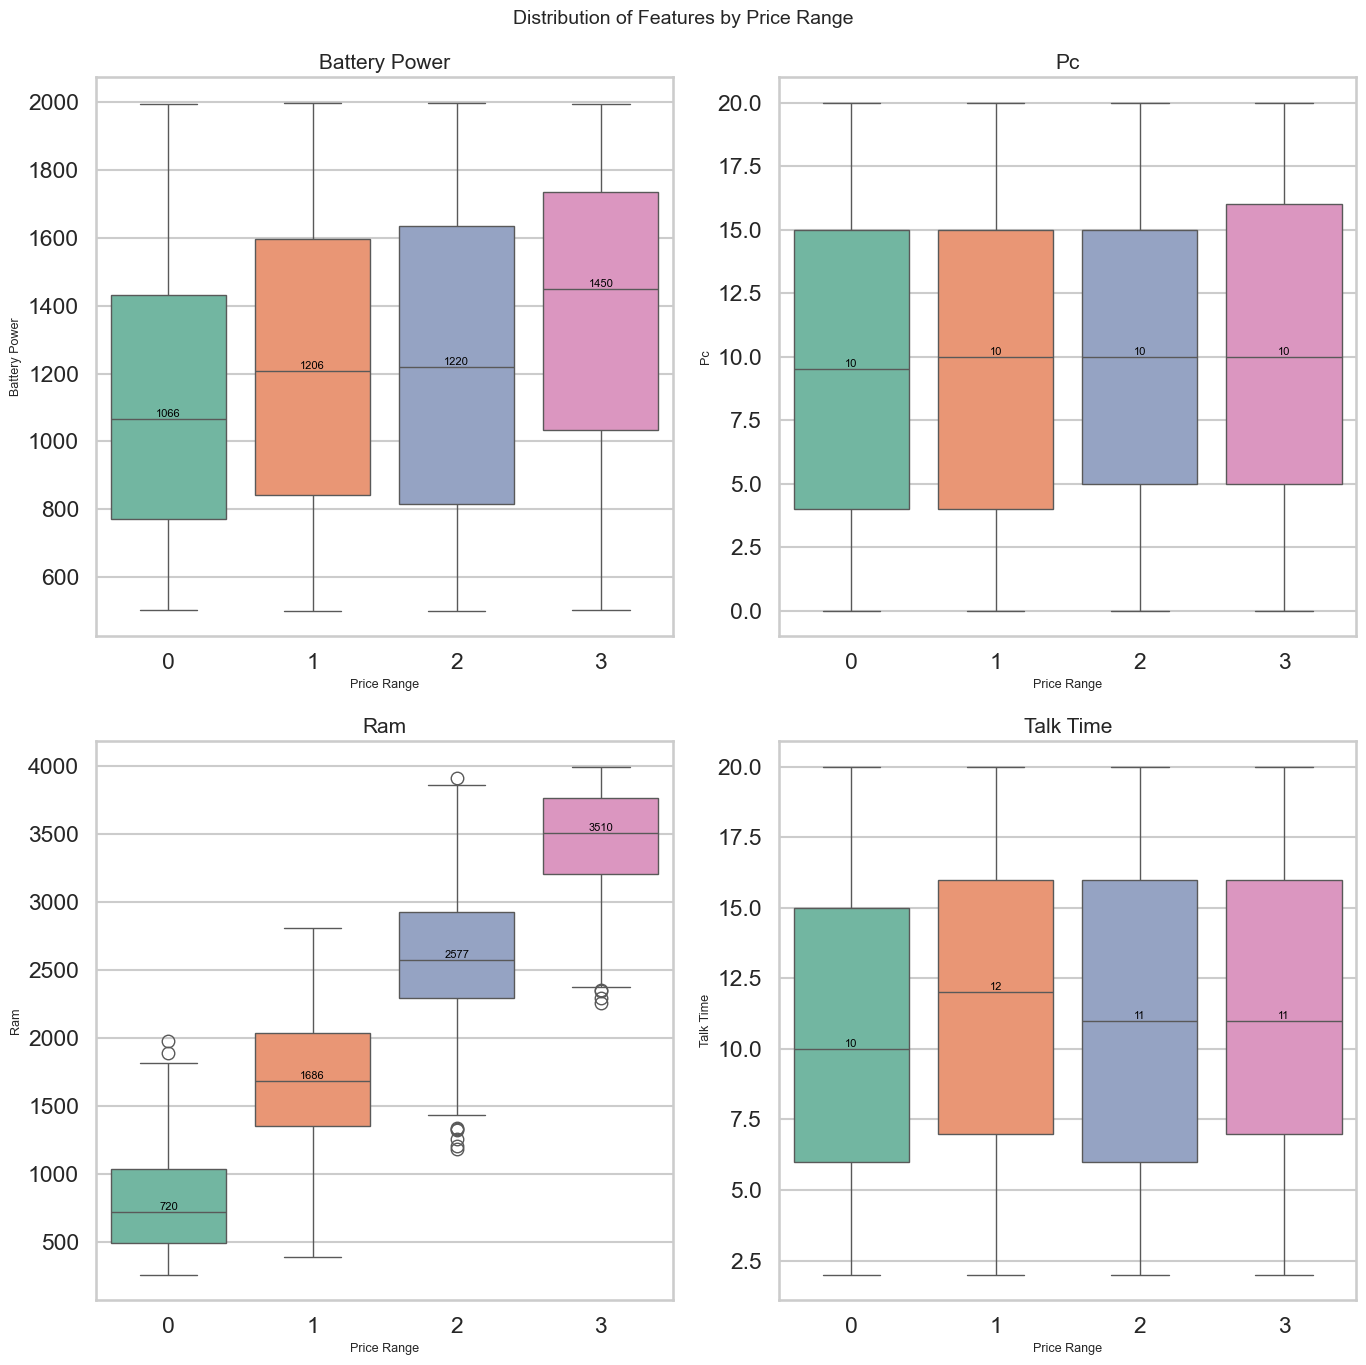

In [103]:
# Create List of Desired Columns/Measurements
cols = ['battery_power', 'pc', 'ram', 'talk_time']

# Create Subplot + Dimensions
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle('Distribution of Features by Price Range', fontsize=14)
axes = axes.flatten()  # flatten for easy iteration

# Use a loop to plot each column as a subplot
for i, col in enumerate(cols):
    ax = axes[i]  # pick the correct subplot
    
    sns.boxplot(
        x='price_range',
        y=col,
        data=df,
        palette='Set2',
        ax=ax
    )

    # Calculate medians per range for this feature
    medians = df.groupby("price_range")[col].median()

    # Add median labels
    for j, price in enumerate(medians.index):
        median_val = medians[price]
        ax.text(
            j, median_val, f"{median_val:.0f}",
            ha='center', va='bottom', color='black',
            fontsize=8
        )
    
    # Set Axis Labels and Title
    ax.set_title(f'{col.replace("_"," ").title()}', fontsize=15)
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=9)
    ax.set_xlabel("Price Range", fontsize=9)
    ax.tick_params(axis='x')  # rotate x-axis labels if needed

plt.tight_layout()
plt.show()

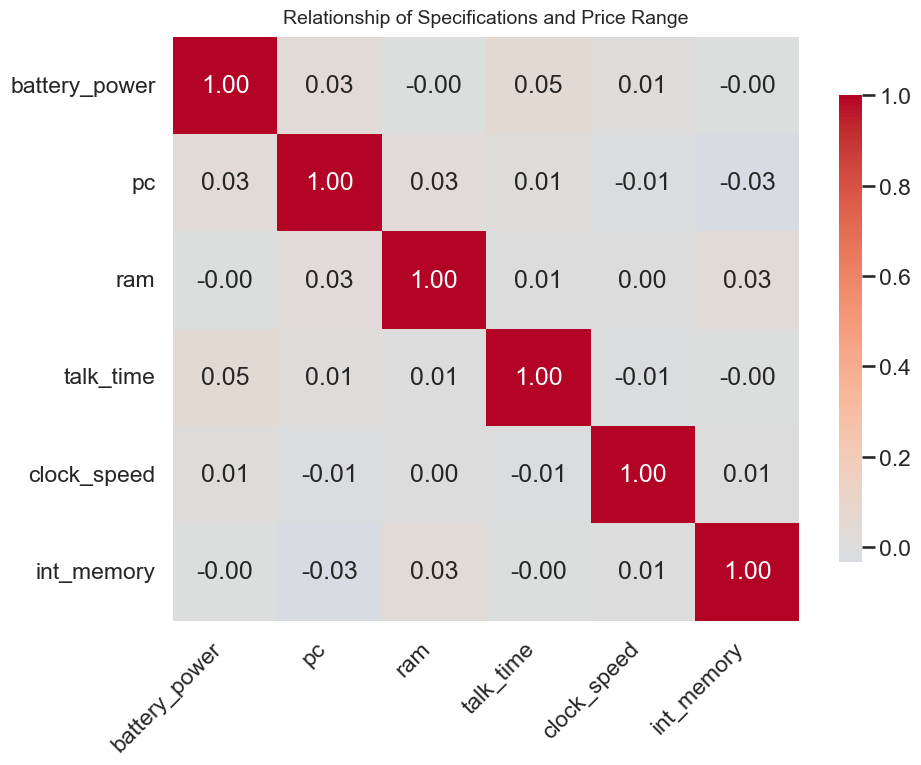

In [104]:
# Plot a heatmap to visualize the correlations between numerical variables
cols = ['battery_power', 'pc', 'ram', 'talk_time', 'clock_speed', 'int_memory']

# Correlation matrix
corr_matrix = df[cols].corr()

# Set figure size
plt.figure(figsize=(10, 8))  # width x height in inches

# Create heatmap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt=".2f",          # format numbers to 2 decimal places
    cbar_kws={'shrink': 0.8}  # shrink colorbar if needed
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  

# Rotate y-axis labels if needed
plt.yticks(rotation=0)  

# Add title
plt.title('Relationship of Specifications and Price Range', fontsize=14, pad=10)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

# Insight Synthesis and Conclusion:

- The Key Determinant of the Price Range was RAM Size, having a correlation score of 0.917.
    - Other Key determinants (less significant than RAM) were Battery Power and PX_Height/Width

- I was expecting there to be a statistically significant difference between the Primary Camera Mega Pixels and Battery Size amongst the different price ranges, but that wasn't the case. It seems RAM is the major determinant of price.